## Code to make Fig 1
Elena Savidge
<br>
3 Aug 2023

In [20]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import cartopy
import cmocean
from pyhdf.SD import SD, SDC
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import pyproj
from pyproj import Proj, transform, CRS
import rasterio as rio
from rasterio.plot import show
from glob import glob
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
from matplotlib.patches import Rectangle
#from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from shapely.geometry import Point, Polygon
import geopandas as gpd
import scipy
from scipy import ndimage
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

In [14]:
# NOTE: need dir to be set up this way for pyproj to work
pyproj.datadir.set_data_dir('/opt/anaconda3/envs/sealenv/share/proj') 

/opt/anaconda3/envs/polyarea/lib/python3.11/site-packages/pyproj/datadir.py:38: UserWarning: pyproj unable to set database path.
  _global_context_set_data_dir()


In [15]:
pwd

'/Users/elenasavidge/Documents/Documents - Elena’s MacBook Pro/PhD_Ch2/manuscriptcode_2'

In [16]:
# read in coastline from https://data.bas.ac.uk/items/e46be5bc-ef8e-4fd5-967b-92863fbe2835/#item-details-citation
coastline = '../../add_coastline_high_res_polygon_v7.2.wgs.shp'

p1 = Point(-110, -70.5)
p2 = Point(-111.7, -75.4)
p3 = Point(-98.0, -75.4)
p4 = Point(-99.5, -70.5)

np1 = (p1.coords.xy[0][0], p1.coords.xy[1][0])
np2 = (p2.coords.xy[0][0], p2.coords.xy[1][0])
np3 = (p3.coords.xy[0][0], p3.coords.xy[1][0])
np4 = (p4.coords.xy[0][0], p4.coords.xy[1][0])

bb_polygon = Polygon([np1, np2, np3, np4])
map_extent = gpd.GeoDataFrame(gpd.GeoSeries(bb_polygon), columns=['geometry'])

shelf = gpd.read_file(coastline)
shelf_clip = gpd.clip(shelf,map_extent)
shelf_clip = shelf_clip[~shelf_clip.is_empty]
land = shelf_clip.loc[shelf_clip['surface'] == 'land']
ice = shelf_clip.loc[shelf_clip['surface'] == 'ice shelf']

/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_84019/1556634297.py:18: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...
Right CRS: None

  shelf_clip = gpd.clip(shelf,map_extent)


### 1. - 13 Oct 2007
All MODIS data can be downloaded here: https://search.earthdata.nasa.gov/, and first visualized here: https://worldview.earthdata.nasa.gov/

In [17]:
# Make list of all MOD09 files in folder
MODfiles = glob('../polynyatimeseries/20071013/MOD09.A2007286.1500.006.2015166183733.hdf')  

# Open first MODIS file and extract temperature, lats, lons
mod09 = SD(MODfiles[0], SDC.READ)   
B1 = (mod09.select('250m Surface Reflectance Band 1')[:])
lat = mod09.select('Latitude')[:]
lon = mod09.select('Longitude')[:]

# upsample 1 km lat, lon to 250 m - to match resolution of visible bands
lat250,lon250 = scipy.ndimage.zoom(lat, 4, order=1),scipy.ndimage.zoom(lon, 4, order=1)

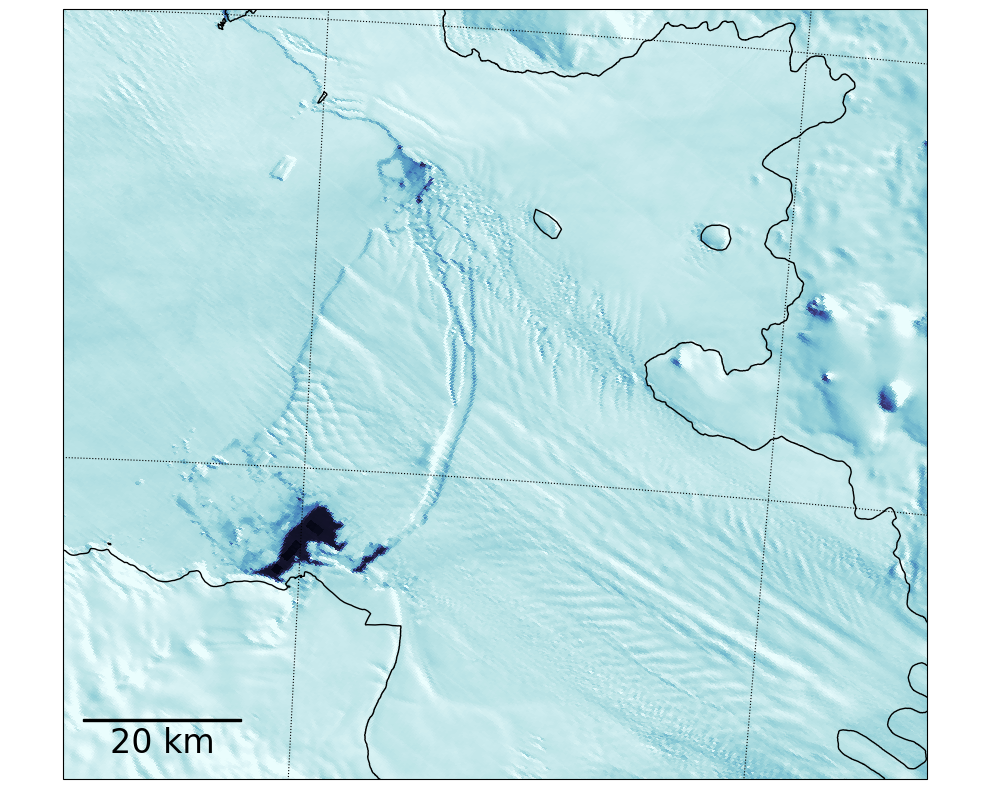

In [57]:
llcrnrlat=-75.3;urcrnrlat=-74.5;llcrnrlon=-103;urcrnrlon=-99.5 # PIG same as seal

fig,ax = plt.subplots(figsize=(10,8)) # give two axes 

plt.axis('off')
m = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=-105.0))
m.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())
m.add_geometries(land['geometry'], crs=ccrs.PlateCarree(),facecolor='None', edgecolor='k')
gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75.5,-75,-74.5,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
#gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
gl.bottom_labels = gl.right_labels = gl.top_labels = gl.left_labels = False

data = m.pcolormesh(lon250,lat250,B1,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice,vmin=0,vmax=10000)

#cb = plt.colorbar(data,fraction=0.045,pad=0.025,orientation='horizontal')#,shrink=0.84)

fontprops = fm.FontProperties(size=24)
scalebar = AnchoredSizeBar(m.transData,
                           20000, '20 km', 'lower left', 
                           pad=0.5,
                           color='k',
                           frameon=False,
                           size_vertical=250,
                           fill_bar=True,
                           sep=3.5,
                           fontproperties=fontprops)

m.add_artist(scalebar)

#plt.show()
plt.tight_layout()

plt.savefig('pol_rift3_2007.jpg', format='jpg', dpi=400)


### 2.- 2017/09/22

In [9]:
# Make list of all MOD09 files in folder
MODfiles = glob('../polynyatimeseries/20170922/MOD09.A2017265.1500.006.2017267020957.hdf')  

# Open first MODIS file and extract temperature, lats, lons
mod09 = SD(MODfiles[0], SDC.READ)   
B1 = (mod09.select('250m Surface Reflectance Band 1')[:])
lat = mod09.select('Latitude')[:]
lon = mod09.select('Longitude')[:]

# upsample 1 km lat, lon to 250 m - to match resolution of visible bands
lat250,lon250 = scipy.ndimage.zoom(lat, 4, order=1),scipy.ndimage.zoom(lon, 4, order=1)

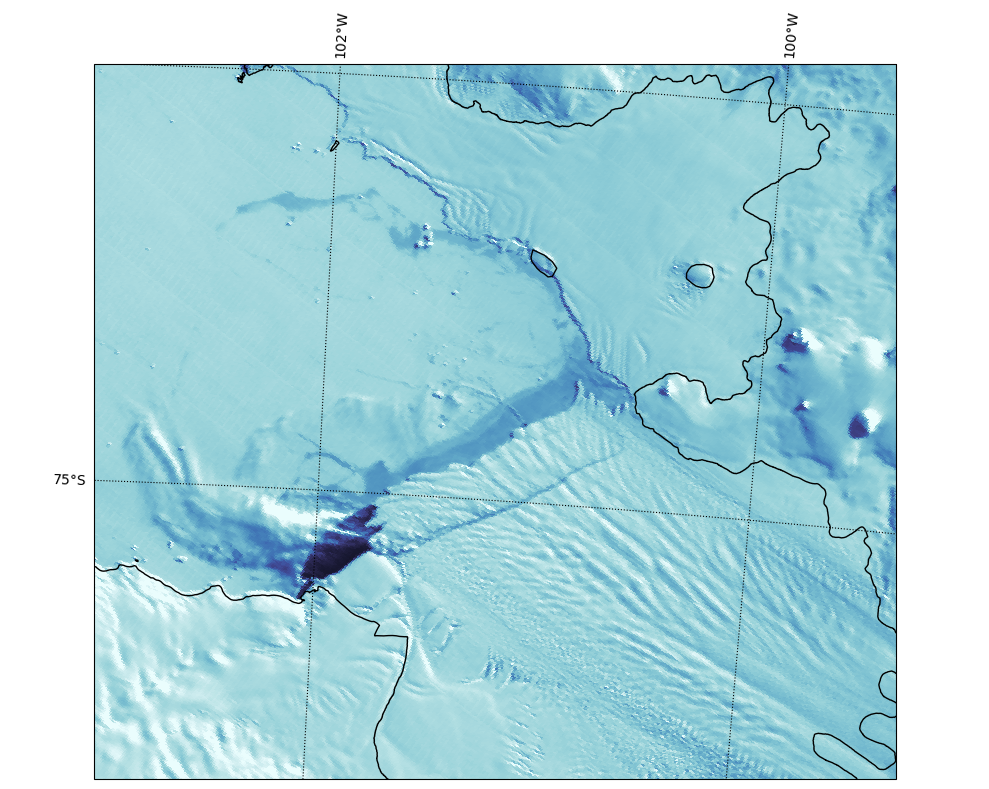

In [10]:
llcrnrlat=-75.3;urcrnrlat=-74.5;llcrnrlon=-103;urcrnrlon=-99.5 # PIG same as seal

fig,ax = plt.subplots(figsize=(10,8)) # give two axes 

plt.axis('off')
m = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=-105.0))
m.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())
m.add_geometries(land['geometry'], crs=ccrs.PlateCarree(),facecolor='None', edgecolor='k')
gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75.5,-75,-74.5,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
#gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
#gl.bottom_labels = gl.right_labels = gl.top_labels = gl.left_labels = False
gl.bottom_labels = gl.right_labels = False

data = m.pcolormesh(lon250,lat250,B1,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice,vmin=0,vmax=10000)

#cb = plt.colorbar(data,fraction=0.045,pad=0.025,orientation='horizontal')#,shrink=0.84)

plt.tight_layout()

#plt.savefig('pol_rift2_2017.jpg', format='jpg', dpi=400)

### 3. - 2022/12/30

In [11]:
# Make list of all MOD09 files in folder
MODfiles = glob('../polynyatimeseries/20221230/MYD09.A2022364.2300.061.2023001023428.hdf')  

# Open first MODIS file and extract temperature, lats, lons
mod09 = SD(MODfiles[0], SDC.READ)   
B1 = (mod09.select('250m Surface Reflectance Band 1')[:])
lat = mod09.select('Latitude')[:]
lon = mod09.select('Longitude')[:]

# upsample 1 km lat, lon to 250 m - to match resolution of visible bands
lat250,lon250 = scipy.ndimage.zoom(lat, 4, order=1),scipy.ndimage.zoom(lon, 4, order=1)

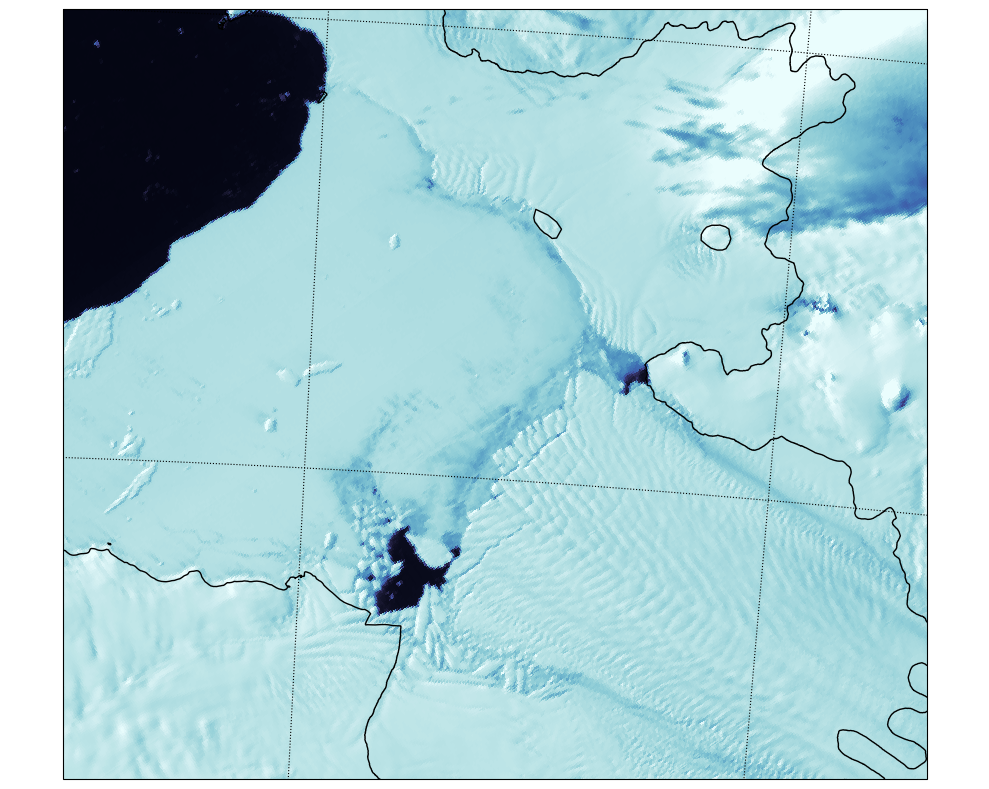

In [12]:
llcrnrlat=-75.3;urcrnrlat=-74.5;llcrnrlon=-103;urcrnrlon=-99.5 # PIG same as seal

fig,ax = plt.subplots(figsize=(10,8)) # give two axes 

plt.axis('off')
m = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=-105.0))
m.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())
m.add_geometries(land['geometry'], crs=ccrs.PlateCarree(),facecolor='None', edgecolor='k')
gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75.5,-75,-74.5,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
#gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
gl.bottom_labels = gl.right_labels = gl.top_labels = gl.left_labels = False


data = m.pcolormesh(lon250,lat250,B1,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice,vmin=0,vmax=10000)

#cb = plt.colorbar(data,fraction=0.045,pad=0.025,orientation='horizontal')#,shrink=0.84)

plt.tight_layout()

#plt.savefig('pol_rift1_2022.jpg', format='jpg', dpi=400)


### Save all panels and make fig in ppt

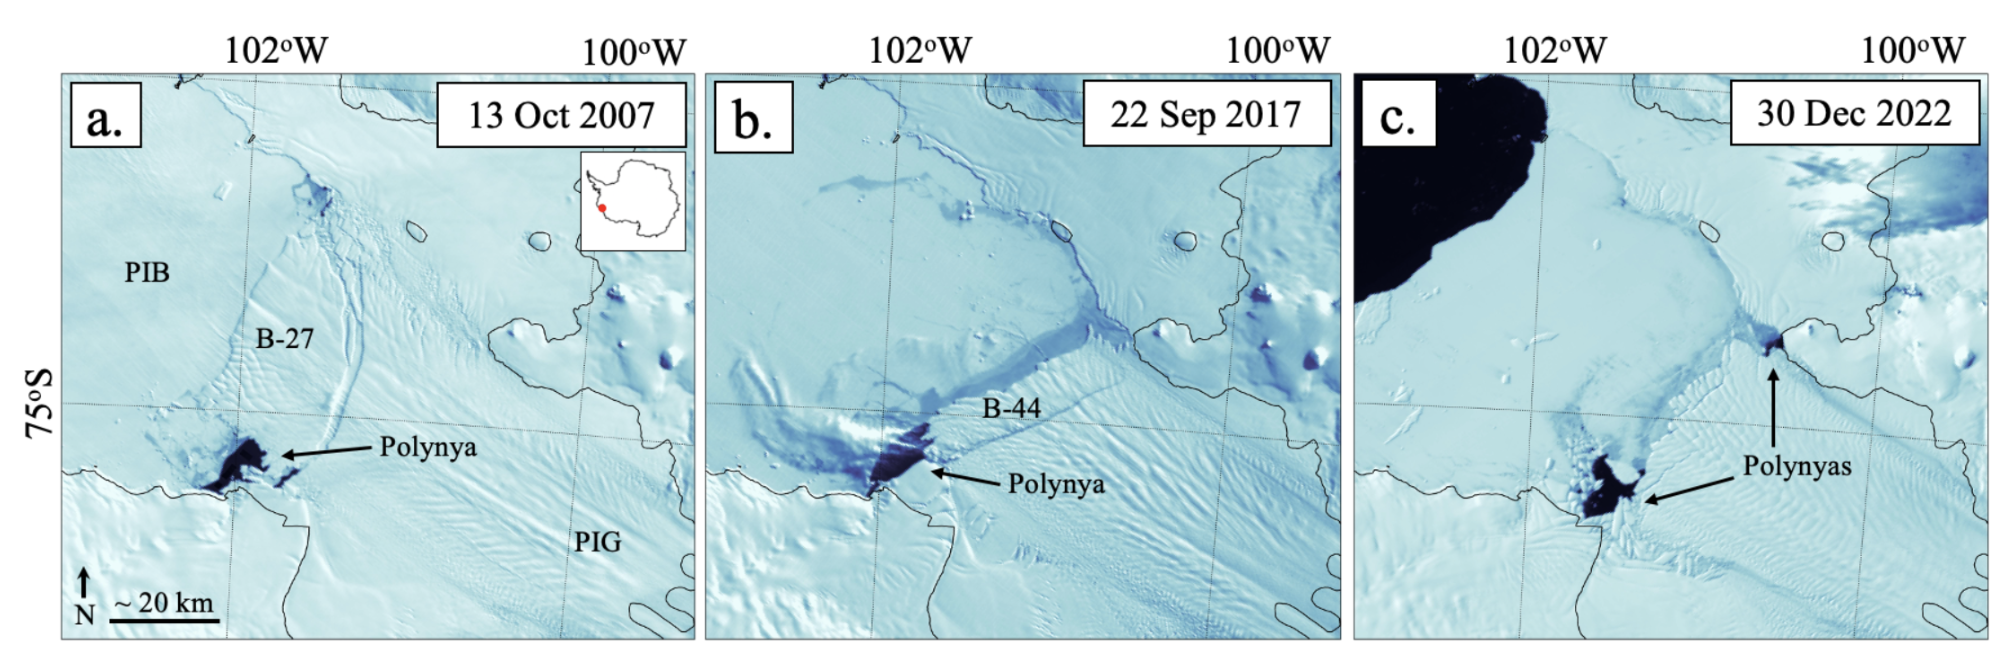